# Reproducing baseline model results

- **Author**: Jack Oliver
- **Date**: 28/04/2024
- **Purpose**: Reproduce the results from [Manore _et al_. (2015)](https://www.tandfonline.com/doi/full/10.1080/17513758.2015.1005698).

## Imports & data

In [1]:
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm_notebook

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt

import matplotlib

# deriving ideal fig size
pt = 1./72.27
my_width = 426.79135*pt
golden = (1 + 5 ** 0.5) / 2
IDEAL_FIG_SIZE = (my_width, my_width/golden)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.weight": "medium",
    "font.serif": "cmr10",  # cmr10 is part of Computer Modern Roman
    "axes.labelsize": 12,   # Corresponds to 12pt
    "font.size": 12,        # General font size
    "legend.fontsize": 12,  # Legend font size
    "xtick.labelsize": 12,  # X-axis tick label size
    "ytick.labelsize": 12,  # Y-axis tick label size
    'axes.formatter.use_mathtext': True,
    'figure.figsize': IDEAL_FIG_SIZE,
    'figure.constrained_layout.use': True,
})

import sys

sys.path.append("../../models/baseline")

from model.model import *
np.random.seed(0)

### Experiments

There are four scenarios in total — baseline (homogeneous patches); heterogeneous patches: high, medium, and low movement.

#### Baseline (homogeneous) patch model

In [2]:
def derive_mu_sigma_lognormal(mean, variance):
    sigma = np.sqrt(np.log(variance/(mean**2) + 1))
    mu    = np.log(mean) - .5*(sigma**2)
    return mu, sigma

def baseline():
    return BaselineModel(
            k=3,
            timestep=0.25,
            movement_dist= lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1, .001)),
            sigma_h_arr=np.array([19, 19, 19]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([1000, 1000, 1000]),
            patch_densities=np.array([1/3, 1/3, 1/3]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            nu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/5, .001)),
            mu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/6, .001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### High movement

In [3]:
def high_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda: np.random.lognormal(*derive_mu_sigma_lognormal(1, .001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            nu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/5, .001)),
            mu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/6, .001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### Medium

In [4]:
def medium_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda: np.random.lognormal(*derive_mu_sigma_lognormal(.1, .001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            nu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/5, .001)),
            mu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/6, .001)),
            total_time=200,
            mosquito_timestep=.005
        )

#### Low

In [5]:
def low_mvmt():
    return BaselineModel(
            k=3,
            movement_dist=lambda: np.random.lognormal(*derive_mu_sigma_lognormal(.01, .001)),
            timestep=0.25,
            sigma_h_arr=np.array([5, 19, 30]),
            sigma_v_arr=np.array([.5, .5, .5]),
            K_v_arr=np.array([750, 1500, 3750]),
            patch_densities=np.array([1/2, 1/3, 1/6]),
            phi_v_arr=np.array([.3, .3, .3]),
            beta_hv_arr=np.array([.33, .33, .33]),
            beta_vh_arr=np.array([.33, .33, .33]),
            nu_v_arr=np.array([.1, .1, .1]),
            mu_v_arr=np.array([1/14, 1/14, 1/14]),
            r_v_arr=np.array([.3-(1/14), .3-(1/14), .3-(1/14)]),
            num_locations=300,
            edge_prob=.03,
            num_agents=1500,
            initial_infect_proportion=.005,
            nu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/5, .001)),
            mu_h_dist=lambda : np.random.lognormal(*derive_mu_sigma_lognormal(1/6, .001)),
            total_time=200,
            mosquito_timestep=.005
        )

## Running models

In [7]:
NAMES = ["Baseline", "High movement", "Medium movement", "Low movement"]

def run_models(num_runs=100,
               generators=[baseline, high_mvmt, medium_mvmt, low_mvmt],
               names=["Baseline", "High movement", "Medium movement", "Low movement"]):
    """Run the different models repeatedly."""
    assert len(generators) == len(names)
    
    data = {name: None for name in names}

    for (name, model_generator) in zip(names, generators):
        print(f"Running {name} model...")
        data[name] = [None] * num_runs
        
        for i in tqdm_notebook(range(num_runs)):
            m = model_generator()
            res, _ = m.run()

            data[name][i] = res

    return data

cur_names = NAMES

In [9]:
data = run_models(num_runs=100)
# data = run_models(num_runs=50, generators=[baseline], names=["Baseline"])

Running Baseline model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running High movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running Medium movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

Running Low movement model...


  0%|          | 0/100 [00:00<?, ?it/s]

### Deriving model statistics

In [10]:
infection_counts = {name: [data[name][i]["total_infected"] for i in range(len(data[name]))] for name in cur_names}

peak_infection_times = {name: {patch: [np.argmax(data[name][i]["num_infected"][patch])/4 for i in range(len(data[name]))] for patch in range(3)} for name in cur_names}

num_infectious_peak  = {name: {patch: [np.max(data[name][i]["num_infected"][patch]) for i in range(len(data[name]))] for patch in range(3)} for name in cur_names}

# epidemic_peak_times  = {name: [np.argmax(np.sum(list(data[name][0]["num_infected"].values()), axis=0))] for name in NAMES}

## Results

#### Figure 3. Total average infected

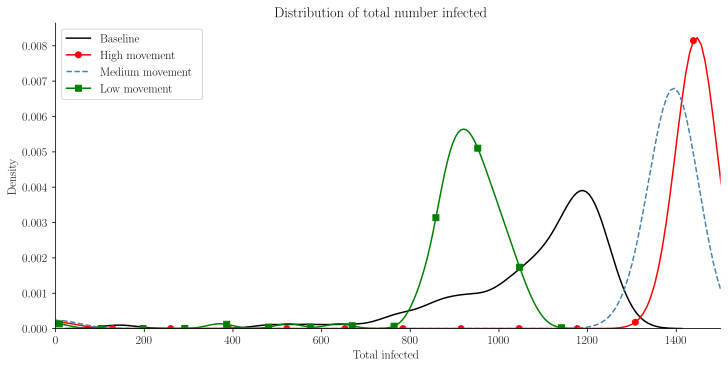

In [11]:
plt.figure(figsize=(10,5))

for (name, color, args) in zip(cur_names,
                                ["black", "red", "steelblue", "green"],
                                [{}, {"marker": 'o', "markevery": 15}, {"linestyle": 'dashed'}, {"marker": 's', "markevery": 15}]):
    sns.kdeplot(infection_counts[name], bw_adjust=.55, color=color, label=name, **args)
# sns.kdeplot(infection_counts["Baseline"], bw_adjust=bw_adjust, color="black", label="Baseline")
# sns.kdeplot(infection_counts["High movement"], bw_adjust=bw_adjust, color="red", marker='o', label="High movement")


plt.xlim(0, 1500)
plt.xlabel("Total infected")
plt.title("Distribution of total number infected")
plt.gca().spines[['right', 'top']].set_visible(False)
plt.legend()
plt.savefig("figs/1.png", dpi=330)

In [2]:
from tol_colors import tol_cmap, tol_cset

In [3]:
ORIGINAL_RESULTS = [1181, 1441, 1391, 939]

cmap = tol_cset('vibrant')
plt.figure(layout='constrained', figsize=(IDEAL_FIG_SIZE[0]*1.5, IDEAL_FIG_SIZE[1]*1.1))

for name, color in zip(cur_names, ['black', 'red', 'steelblue', 'green']):
    plt.hist(infection_counts[name], density=True, color=color, bins=75, alpha=.4)
    sns.kdeplot(infection_counts[name], bw_adjust=.55, color=color, label=name, linewidth=2)

plt.xlim(0, 1500)
plt.xlabel("Agents infected at end of simulation run")
# plt.title("Distribution of total number infected")
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylim(0,0.009)
plt.legend(frameon=False)

for line_no, (name, og_res) in enumerate(zip(cur_names, ORIGINAL_RESULTS)):
    line_data = plt.gca().lines[line_no].get_xydata()
    new_res   = np.round(line_data[np.argmax(line_data[:, 1])][0],0)
    print(f"Scenario '{name}: {new_res} (old: {og_res}); relative error = {100*(new_res-og_res)/og_res:.2f}%")

plt.savefig("figs/validation_unscaled.pdf")

NameError: name 'plt' is not defined

#### Figure 4. Total hosts initially infected

<mark>TODO: I don't know what this figure means.</mark>

#### Figure 5. Estimated basic reproduction number

<mark>TODO: I don't know how they derived this.</mark>

#### Figure 6. Distributions for timing of epidemic peak

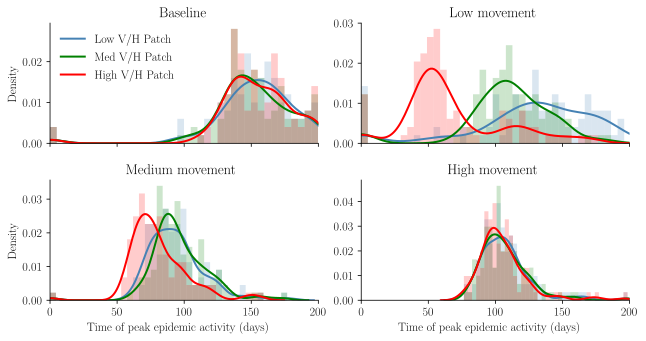

In [83]:
fig, axs = plt.subplots(layout='constrained',
                        nrows=2, ncols=2,
                        figsize=(IDEAL_FIG_SIZE[0]*1.5, IDEAL_FIG_SIZE[1]*1.3))
temp_names = [NAMES[0]] + NAMES[1:][::-1]
patch_names = ["Low V/H Patch", "Med V/H Patch", "High V/H Patch"]

cur_name = 0
for row in axs:
    for col in row:
        for (patch, name, color, args) in zip(range(3), range(1,4), ["steelblue", "green", "red"], [{}, {"marker": "o", "markevery": 15}, {"linestyle": "dashed"}]):
            # sns.kdeplot(peak_infection_times[temp_names[cur_name]][patch], ax=col, bw_adjust=.75, color=color, label=f"Patch {name}" if cur_name == 0 else None, **args)
            min_data_bins = np.min([peak_infection_times[temp_names[cur_name]][p] for p in range(3)])
            max_data_bins = np.max([peak_infection_times[temp_names[cur_name]][p] for p in range(3)])
            binwidth  = .025*(max_data_bins-min_data_bins)
            
            col.hist(peak_infection_times[temp_names[cur_name]][patch],
                     bins=np.arange(min_data_bins, max_data_bins + binwidth, binwidth),
                     density=True,
                     color=color,
                     # bins=25,
                     alpha=.2)
            sns.kdeplot(peak_infection_times[temp_names[cur_name]][patch],
                        ax=col,
                        bw_adjust=.75,
                        color=color,
                        label=patch_names[patch] if cur_name == 0 else None,
                        linewidth=2)

        col.set_xlim(0,200)
        col.spines[['right', 'top']].set_visible(False)
        
        col.set_xlabel("")
        col.set_ylabel("")

        col.set_title(temp_names[cur_name])

        if cur_name==0:
            l = col.legend(frameon=False)
            l.get_frame().set_linewidth(0.0)
        
        cur_name += 1

# fig.suptitle("Timing of epidemic peak for patches")

axs[1,0].set_xlabel("Time of peak epidemic activity (days)")
axs[1,1].set_xlabel("Time of peak epidemic activity (days)")

fig.get_layout_engine().set(h_pad=.1)# / 72, h_pad=4 / 72, hspace=0, wspace=0)

axs[0,0].tick_params(axis='x', labelbottom=False)
axs[0,1].tick_params(axis='x', labelbottom=False)

axs[0,0].set_ylabel("Density")
axs[1,0].set_ylabel("Density")

# fig.legend(bbox_to_anchor=[1.12, 0.875])
# fig.tight_layout()
plt.savefig("figs/validation_2.pdf")

#### Figure 7. Number of people infectious at epidemic peak time

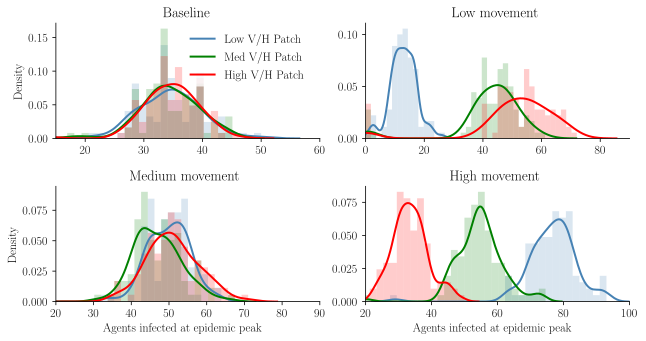

In [82]:
fig, axs = plt.subplots(layout='constrained',
                        nrows=2, ncols=2,
                        figsize=(IDEAL_FIG_SIZE[0]*1.5, IDEAL_FIG_SIZE[1]*1.3))

temp_names = [NAMES[0]] + NAMES[1:][::-1]
lims = [(15,60), (0,90), (20,90), (20,100)]
leg_ax = 0

cur_name = 0
for row in axs:
    for col in row:
        for (patch, name, color, args) in zip(range(3), range(1,4), ["steelblue", "green", "red"], [{}, {"marker": "o", "markevery": 15}, {"linestyle": "dashed"}]):
            min_data_bins = np.min([num_infectious_peak[temp_names[cur_name]][p] for p in range(3)])
            max_data_bins = np.max([num_infectious_peak[temp_names[cur_name]][p] for p in range(3)])
            binwidth  = .025*(max_data_bins-min_data_bins)
            
            col.hist(num_infectious_peak[temp_names[cur_name]][patch],
                     bins=np.arange(min_data_bins, max_data_bins + binwidth, binwidth),
                     density=True,
                     color=color,
                     # bins=25,
                     alpha=.2)
            sns.kdeplot(num_infectious_peak[temp_names[cur_name]][patch],
                        ax=col,
                        bw_adjust=.75,
                        color=color,
                        label=patch_names[patch] if cur_name == leg_ax else None,
                        linewidth=2)

        col.set_xlim(*lims[cur_name])
        col.spines[['right', 'top']].set_visible(False)

        col.set_xlabel("")
        col.set_ylabel("")

        if cur_name==leg_ax:
            l = col.legend(frameon=True)
            l.get_frame().set_linewidth(0.0)

        col.set_title(temp_names[cur_name])
        
        cur_name += 1

# plt.suptitle("Number of infectious people at epidemic peak")

# fig.supxlabel("Agents infected at epidemic peak")
# fig.supylabel("Density")

axs[1,0].set_xlabel("Agents infected at epidemic peak")
axs[1,1].set_xlabel("Agents infected at epidemic peak")

fig.get_layout_engine().set(h_pad=.1)# / 72, h_pad=4 / 72, hspace=0, wspace=0)

axs[0,0].set_ylabel("Density")
axs[1,0].set_ylabel("Density")

# fig.legend(bbox_to_anchor=[1.12, 0.875])
# fig.tight_layout()
plt.savefig("figs/validation_3.pdf")

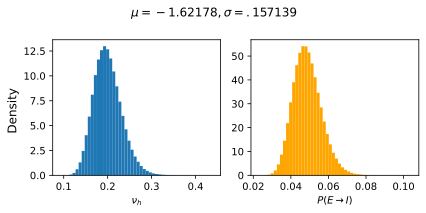

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

axs[0].hist((nus:=np.random.lognormal(mean=-1.62178, sigma=.157139, size=1_000_000)), bins=50, density=True)
axs[1].hist((1-np.exp(-.25*nus)), color='orange', density=True, bins=50)

fig.suptitle(r"$\mu=-1.62178,\sigma=.157139$")

axs[0].set_xlabel(r"$\nu_h$")
axs[1].set_xlabel(r"$P(E\to I)$")

fig.supylabel("Density")
fig.tight_layout()

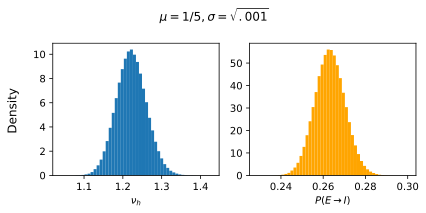

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

axs[0].hist((nus:=np.random.lognormal(mean=1/5, sigma=np.sqrt(.001), size=1_000_000)), bins=50, density=True)
axs[1].hist((1-np.exp(-.25*nus)), color='orange', density=True, bins=50)

fig.suptitle(r"$\mu=1/5,\sigma=\sqrt{.001}$")

axs[0].set_xlabel(r"$\nu_h$")
axs[1].set_xlabel(r"$P(E\to I)$")

fig.supylabel("Density")
fig.tight_layout()

## Individual model runs

In [27]:
runs = 20
data = run_models(runs, [high_mvmt], ["high movement"])

Running high movement model...


  0%|          | 0/20 [00:00<?, ?it/s]

In [53]:
x = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[2, 1, 3], [4, 4, 4], [9, 9, 9]]
])

# np.std(x, axis=2)

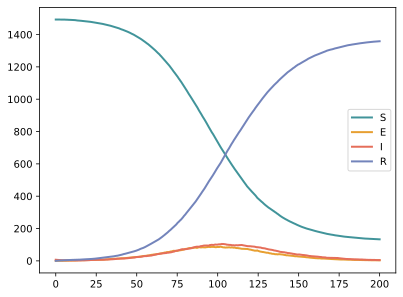

In [55]:
runs = 20
t = np.linspace(0, 200, 800)
avgs = np.mean([data["high movement"][i]["agent_disease_counts"] for i in range(runs)], axis=0)

for i, c in zip(range(4), ["#41949A", "#e79f31", "#E56E5A", "#7384BB"]):
    plt.plot(t, avgs[i], label=["S","E","I","R"][i], color=c, linewidth=2)

    # ci = 1.96 * np.std([data["high movement"][j]["agent_disease_counts"][i] for j in range(runs)])/np.sqrt(runs)
    # plt.gca().fill_between(t, np.maximum(avgs[i]-ci, 0), avgs[i]+ci, color=c, alpha=.1)
    
plt.legend()
plt.show()